# 去批次效应

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

## 步骤
- 查看不同批次的箱图
- 合并具有共同基因的samples,按照列合并
- 

## 载入数据

In [35]:
##

mm = pd.read_csv("GSE122340.csv", index_col=0)
mm2 = pd.read_csv("GSE69948.csv", index_col=0)

In [36]:
mm.head()


,GSM3464197_1.0463,GSM3464198_3_0698,GSM3464199_4.0943,GSM3464200_9.0573,GSM3464201_B1,GSM3464202_B10.c.B76,GSM3464203_B100,GSM3464204_B101,GSM3464205_B107,GSM3464206_B109,...,GSM3464372_R0421,GSM3464373_R0526,GSM3464374_R0821,GSM3464318_UC8926,GSM3464319_UC9009,GSM3464320_UC9011,GSM3464321_UC9023,GSM3464322_UC9035,GSM3464323_UC9101,GSM3464324_UC9612
1-Dec,0.000482,1.637705e-01,7.500000e-07,0.000139,0.100839,0.006226,5.686750e-04,0.138040,0.309844,0.090335,...,0.000000,0.000000,0.000000,0.002630,2.497220e-01,0.001029,0.000729,0.000543,0.001514,3.607460e-04
1-Mar,2.168918,1.883328e+00,1.968924e+00,2.174486,1.772908,2.151680,1.417121e+00,2.065417,1.153163,1.224263,...,1.835823,1.622790,1.672421,0.586840,7.202084e-01,1.287224,1.673859,0.805747,1.519416,1.586611e+00
1-Sep,1.744902,1.510851e+00,1.544985e+00,1.765259,2.726509,2.074738,2.026701e+00,2.723753,2.215818,2.310206,...,2.598777,2.522699,2.847588,1.717430,1.982203e+00,1.217541,1.564310,1.037944,1.294006,1.026311e+00
10-Mar,0.000000,6.060000e-10,0.000000e+00,0.041037,0.000000,0.206369,8.300000e-10,0.045673,0.094800,0.257178,...,0.000000,0.013361,0.051625,0.000000,1.400000e-13,0.000000,0.000000,0.000000,0.000736,3.150000e-10
10-Sep,5.107408,4.924309e+00,4.471233e+00,4.712277,4.299552,4.528671,4.108759e+00,4.552949,4.288883,3.813956,...,4.057494,3.689478,3.045876,4.298556,2.426128e+00,4.533987,4.567059,4.055430,4.803955,4.361733e+00


In [37]:
mm.columns

Index(['GSM3464197_1.0463', 'GSM3464198_3_0698', 'GSM3464199_4.0943',
       'GSM3464200_9.0573', 'GSM3464201_B1', 'GSM3464202_B10.c.B76',
       'GSM3464203_B100', 'GSM3464204_B101', 'GSM3464205_B107',
       'GSM3464206_B109',
       ...
       'GSM3464372_R0421', 'GSM3464373_R0526', 'GSM3464374_R0821',
       'GSM3464318_UC8926', 'GSM3464319_UC9009', 'GSM3464320_UC9011',
       'GSM3464321_UC9023', 'GSM3464322_UC9035', 'GSM3464323_UC9101',
       'GSM3464324_UC9612'],
      dtype='object', length=178)

In [38]:
mm2.head()

,NC1,NC2,DC1,DC2,DC3,DC4,NC3,BA1,BA2,BA3,BA4,BA5,BA6
10-Sep,10.533816,12.114230,10.564149,10.679040,12.292465,12.148000,11.512740,12.384919,11.914385,12.754261,11.992053,12.627420,11.089119
11-Mar,13.084144,13.644870,12.798067,13.250891,13.101155,13.142586,13.723768,13.765597,13.493480,13.426265,13.595141,13.567362,11.738092
11-Sep,12.853894,13.269419,12.756139,13.055621,13.723768,13.442036,13.425478,13.739675,13.824163,13.953833,13.936914,13.772315,13.664225
12-Sep,13.827343,13.751753,13.988773,13.941598,14.201128,13.940772,14.233245,14.123313,14.279393,14.221587,14.337064,14.249484,14.118454
15-Sep,12.924534,13.286197,12.991965,12.941139,13.412504,13.290379,13.341032,13.429145,13.437557,13.696533,13.468433,13.672315,12.941781


## 原始数据整体散点图

In [56]:
cut_mm = mm.iloc[:, [0,1,2,3]]
mm_trans = pd.melt(cut_mm, value_vars=cut_mm.columns, var_name='samples', value_name='exp')

In [57]:
mm_trans

,samples,exp
0,GSM3464197_1.0463,0.000482
1,GSM3464197_1.0463,2.168918
2,GSM3464197_1.0463,1.744902
3,GSM3464197_1.0463,0.000000
4,GSM3464197_1.0463,5.107408
...,...,...
70899,GSM3464200_9.0573,0.520015
70900,GSM3464200_9.0573,2.592378
70901,GSM3464200_9.0573,5.653355
70902,GSM3464200_9.0573,2.532564


/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


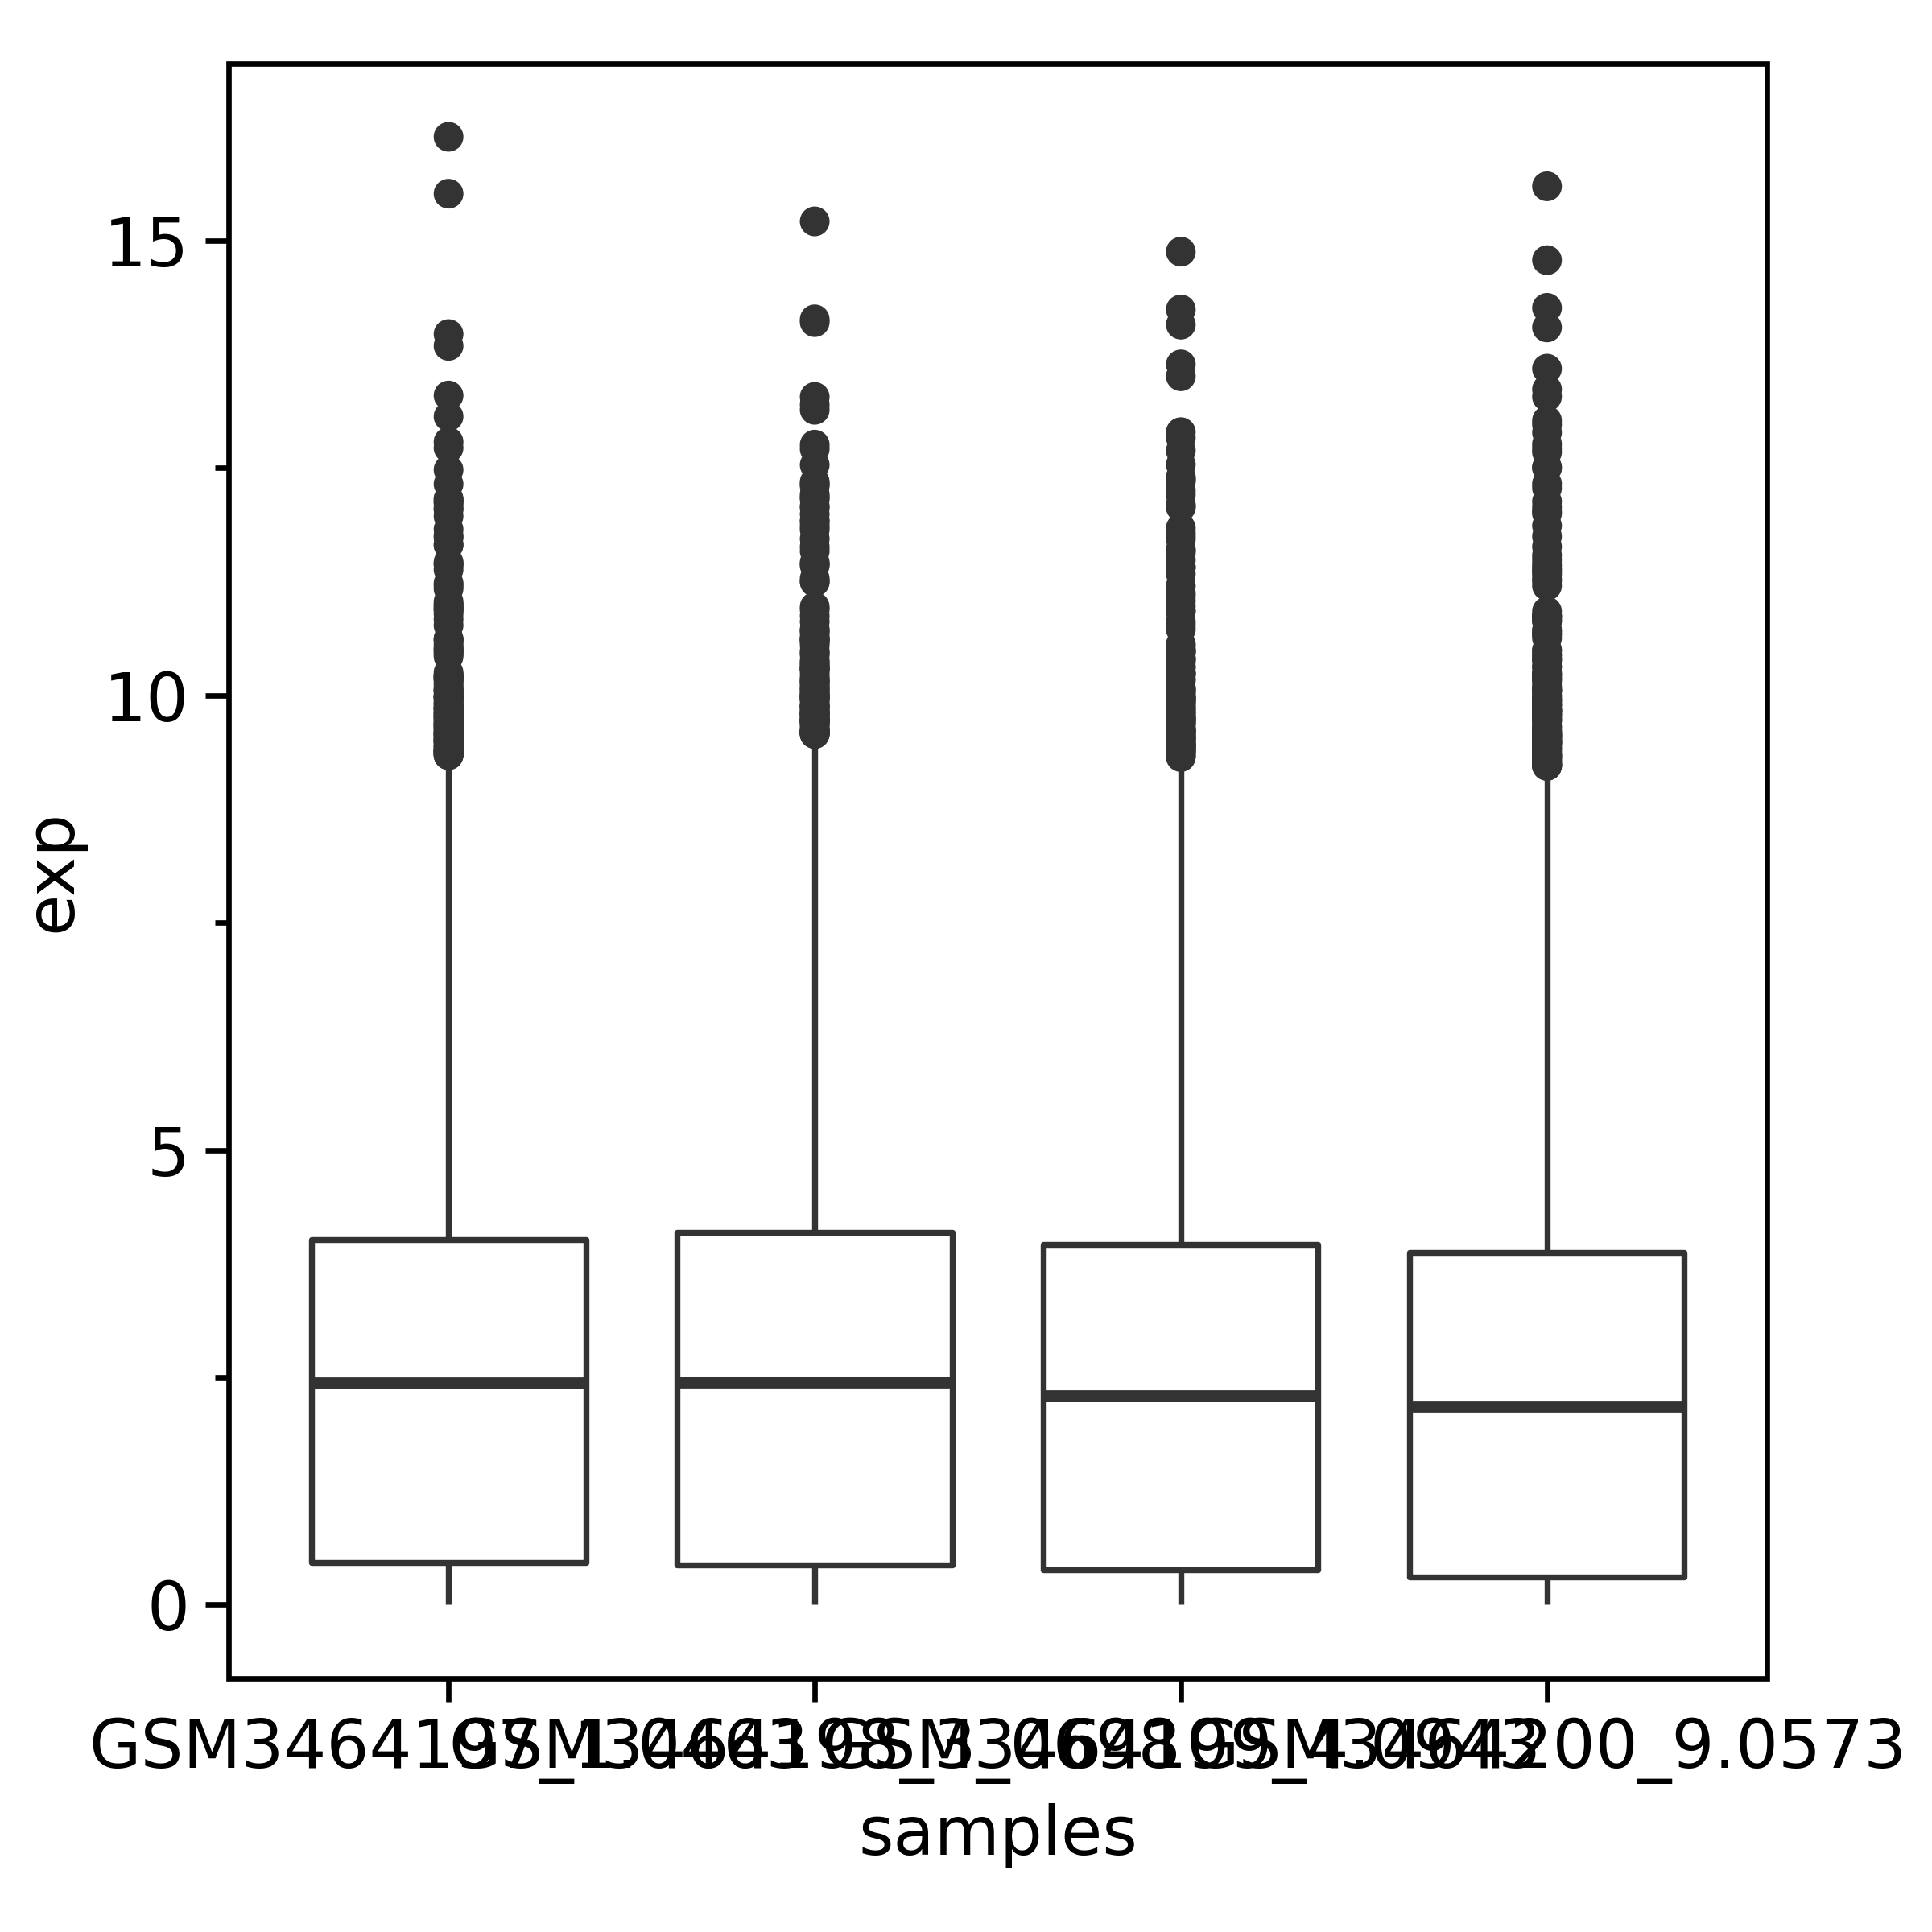

In [58]:
box_plot=(ggplot(mm_trans, 
                 aes(x="samples", y="exp"))+geom_boxplot(show_legend=False)
#+geom_jitter(fill='black',shape='.',width=0.3,size=3,stroke=0.1,show_legend=False)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(aspect_ratio =1.05,
       dpi=300,
       figure_size=(4,4)))


box_plot


In [59]:
## mm2原始数据箱图